<a href="https://colab.research.google.com/github/soodeh-nilforoushan/Recurrent-Neural-Network/blob/main/5_TF_Autoregressive_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q tensorflow
import tensorflow as tf
print(tf.__version__)

2.12.0


In [3]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


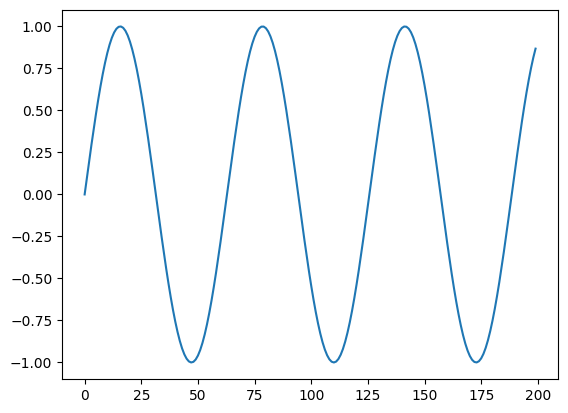

In [4]:
#make the original data set
series=np.sin(0.1*np.arange(200))

plt.plot(series)
plt.show()

In [6]:
#build the dataset
#lets see if we can use 10 past values to predict the next value
T=10
X=[]
Y=[]
for t in range(len(series)-T):
  x=series[t:t+T]
  X.append(x)
  y=series[t+T]
  Y.append(y)
X=np.array(X).reshape(-1,T)
Y=np.array(Y)
N=len(X)
print("X.shape", X.shape,"Y.shape", Y.shape)

X.shape (190, 10) Y.shape (190,)


In [14]:
#try autoregressive linear model
i=Input(shape=(T,))
x=Dense(1)(i)
model=Model(i,x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.1)
)
#train the RNN
r=model.fit(
    X[:-N//2],Y[:-N//2], #You don't want to split up your data randomly, let's say using the scikit learn function. Train test split. This wouldn't make sense because a real forecasting model has to predict the future. It can't train on points within that future.Thus, our model trains only on the first half of the data set and validates on the second half. Now since sine w
    epochs=80,
    validation_data=(X[-N//2:],Y[-N//2:]),
            )


Epoch 1/80


3/3 [==============================] - 1s 104ms/step - loss: 0.1748 - val_loss: 0.1687
Epoch 2/80
3/3 [==============================] - 0s 26ms/step - loss: 0.1647 - val_loss: 0.1601
Epoch 3/80
3/3 [==============================] - 0s 24ms/step - loss: 0.1550 - val_loss: 0.1522
Epoch 4/80
3/3 [==============================] - 0s 17ms/step - loss: 0.1464 - val_loss: 0.1452
Epoch 5/80
3/3 [==============================] - 0s 20ms/step - loss: 0.1390 - val_loss: 0.1388
Epoch 6/80
3/3 [==============================] - 0s 21ms/step - loss: 0.1324 - val_loss: 0.1333
Epoch 7/80
3/3 [==============================] - 0s 25ms/step - loss: 0.1260 - val_loss: 0.1286
Epoch 8/80
3/3 [==============================] - 0s 25ms/step - loss: 0.1215 - val_loss: 0.1243
Epoch 9/80
3/3 [==============================] - 0s 18ms/step - loss: 0.1169 - val_loss: 0.1206
Epoch 10/80
3/3 [==============================] - 0s 17ms/step - loss: 0.1129 - val_loss: 0.1173
Epoch 11/80
3/3 [======================

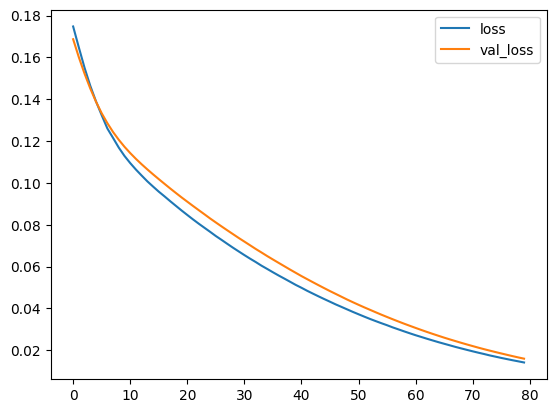

In [15]:
#plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()

In [17]:
#wrong forecast using true targets
validation_target=Y[-N//2:]
validation_predictions=[]

#index of first validation input
i=-N//2

while len(validation_predictions)<len(validation_target):
  p=model.predict(X[i].reshape(1,-1))[0,0]
  i+=1

  #update the predictions list
  validation_predictions.append(p)

1/1 [==============================] - 0s 24ms/step


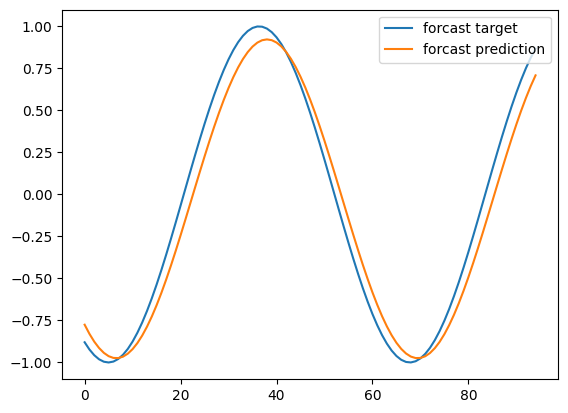

In [18]:
plt.plot(validation_target, label="forcast target")
plt.plot(validation_predictions,label="forcast prediction")
plt.legend()

In [ ]:
#wrong forecast using true targets
validation_target=Y[-N//2:]
validation_predictions=[]

#index of first validation input
i=-N//2

while len(validation_predictions)<len(validation_target):
  p=model.predict(X[i].reshape(1,-1))[0,0]
  i+=1

  #update the predictions list
  validation_predictions.append(p)